In [73]:
import numpy as np
import pandas as pd
import pickle

import seaborn as sns
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

import warnings
warnings.filterwarnings("ignore")

In [74]:
df=pd.read_csv('C:\\Users\\HP\\Downloads\\fraud data1.csv')
df.head(10)

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,credit,315.0,87.0
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,credit,325.0,87.0
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,debit,330.0,87.0
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,debit,476.0,87.0
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,credit,420.0,87.0
5,2987005,0,86510,49.0,W,5937,555.0,150.0,visa,226.0,debit,272.0,87.0
6,2987006,0,86522,159.0,W,12308,360.0,150.0,visa,166.0,debit,126.0,87.0
7,2987007,0,86529,422.5,W,12695,490.0,150.0,visa,226.0,debit,325.0,87.0
8,2987008,0,86535,15.0,H,2803,100.0,150.0,visa,226.0,debit,337.0,87.0
9,2987009,0,86536,117.0,W,17399,111.0,150.0,mastercard,224.0,debit,204.0,87.0


In [54]:
print(df.shape)

(100000, 13)


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   TransactionID   100000 non-null  int64  
 1   isFraud         100000 non-null  int64  
 2   TransactionDT   100000 non-null  int64  
 3   TransactionAmt  100000 non-null  float64
 4   ProductCD       100000 non-null  object 
 5   card1           100000 non-null  int64  
 6   card2           98646 non-null   float64
 7   card3           99997 non-null   float64
 8   card4           99993 non-null   object 
 9   card5           99475 non-null   float64
 10  card6           99996 non-null   object 
 11  addr1           90963 non-null   float64
 12  addr2           90963 non-null   float64
dtypes: float64(6), int64(4), object(3)
memory usage: 9.9+ MB


In [56]:
summary = df.describe()

print(summary)

       TransactionID       isFraud  TransactionDT  TransactionAmt  \
count   1.000000e+05  100000.00000   1.000000e+05   100000.000000   
mean    3.037000e+06       0.02561   1.135124e+06      130.743351   
std     2.886766e+04       0.15797   5.733484e+05      206.024684   
min     2.987000e+06       0.00000   8.640000e+04        0.292000   
25%     3.012000e+06       0.00000   6.537488e+05       45.000000   
50%     3.037000e+06       0.00000   1.189342e+06       75.000000   
75%     3.061999e+06       0.00000   1.643471e+06      135.950000   
max     3.086999e+06       1.00000   2.006364e+06     4829.950000   

              card1         card2         card3         card5         addr1  \
count  100000.00000  98646.000000  99997.000000  99475.000000  90963.000000   
mean     9878.39890    370.885976    153.236677    200.072300    291.414663   
std      4933.56307    159.244910     11.151527     40.905215    103.076940   
min      1001.00000    100.000000    100.000000    100.000000 

In [57]:
df.isnull().sum()

TransactionID        0
isFraud              0
TransactionDT        0
TransactionAmt       0
ProductCD            0
card1                0
card2             1354
card3                3
card4                7
card5              525
card6                4
addr1             9037
addr2             9037
dtype: int64

In [58]:
df.isnull().sum().sum()

19967

In [59]:
df.isnull().mean()

TransactionID     0.00000
isFraud           0.00000
TransactionDT     0.00000
TransactionAmt    0.00000
ProductCD         0.00000
card1             0.00000
card2             0.01354
card3             0.00003
card4             0.00007
card5             0.00525
card6             0.00004
addr1             0.09037
addr2             0.09037
dtype: float64

In [60]:
# Interpolate missing values using the 'polynomial' method
df_interpolated = df.interpolate(method='polynomial', order=2)

# Interpolate missing values using the 'nearest' method
df_interpolated = df.interpolate(method='nearest')

In [61]:
df_interpolated = df.dropna()

In [62]:
df_interpolated

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2
1,2987001,0,86401,29.00,W,2755,404.0,150.0,mastercard,102.0,credit,325.0,87.0
2,2987002,0,86469,59.00,W,4663,490.0,150.0,visa,166.0,debit,330.0,87.0
3,2987003,0,86499,50.00,W,18132,567.0,150.0,mastercard,117.0,debit,476.0,87.0
4,2987004,0,86506,50.00,H,4497,514.0,150.0,mastercard,102.0,credit,420.0,87.0
5,2987005,0,86510,49.00,W,5937,555.0,150.0,visa,226.0,debit,272.0,87.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,3086994,0,2005980,97.00,W,14290,512.0,150.0,visa,226.0,debit,444.0,87.0
99996,3086996,0,2006074,117.00,W,2518,555.0,150.0,visa,226.0,debit,512.0,87.0
99997,3086997,0,2006135,50.00,S,2748,111.0,150.0,visa,228.0,credit,441.0,87.0
99998,3086998,0,2006177,100.00,H,16075,514.0,150.0,mastercard,102.0,credit,299.0,87.0


In [63]:
df_interpolated['card2'].fillna(df['card2'].mean(), inplace=True)


In [64]:
df_interpolated.isnull().sum()

TransactionID     0
isFraud           0
TransactionDT     0
TransactionAmt    0
ProductCD         0
card1             0
card2             0
card3             0
card4             0
card5             0
card6             0
addr1             0
addr2             0
dtype: int64

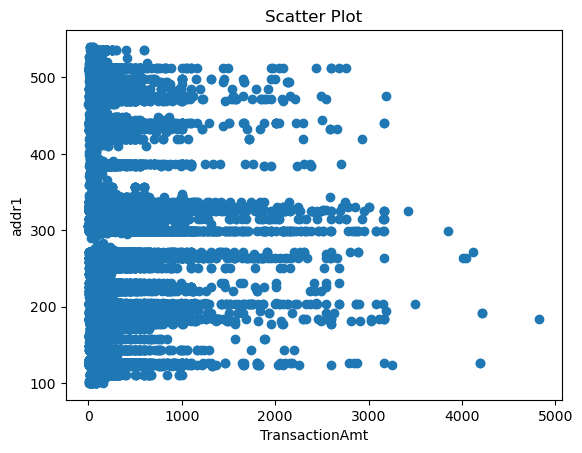

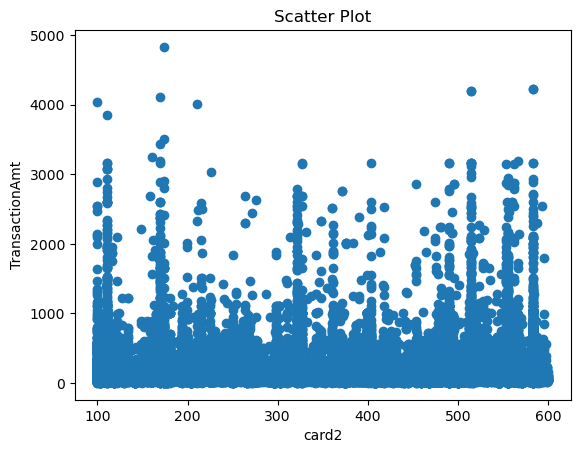

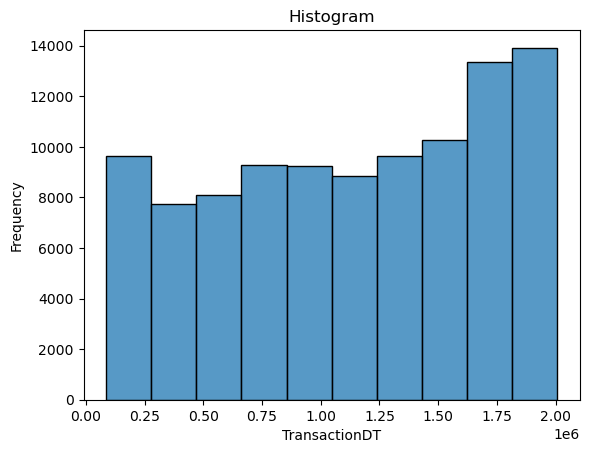

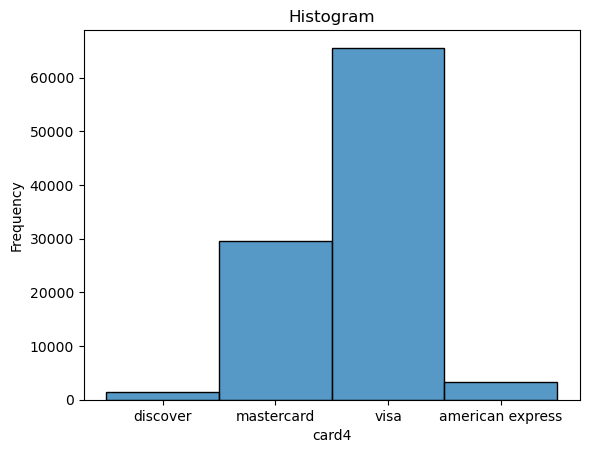

In [88]:
# Create a scatter plot
plt.scatter(df['TransactionAmt'], df['addr1'])
plt.xlabel('TransactionAmt')
plt.ylabel('addr1')
plt.title('Scatter Plot')
plt.show()

plt.scatter(df['card2'], df['TransactionAmt'])
plt.xlabel('card2')
plt.ylabel('TransactionAmt')
plt.title('Scatter Plot')
plt.show()


# Create a histogram
sns.histplot(df['TransactionDT'], bins=10)
plt.xlabel('TransactionDT')
plt.ylabel('Frequency')
plt.title('Histogram')
plt.show()

sns.histplot(df['card4'], bins=10)
plt.xlabel('card4')
plt.ylabel('Frequency')
plt.title('Histogram')
plt.show()

In [72]:
# Separate the features (X) and the target variable (y)
X = df_interpolated.drop(columns=['isFraud'])
y = df_interpolated['isFraud']
# Perform one-hot encoding for categorical variables
categorical_cols = ['ProductCD','card4','card6']
X_encoded = pd.get_dummies(X, columns=categorical_cols)


In [71]:
X_encoded

,TransactionID,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,ProductCD_C,...,ProductCD_R,ProductCD_S,ProductCD_W,card4_american express,card4_discover,card4_mastercard,card4_visa,card6_credit,card6_debit,card6_debit or credit
1,2987001,86401,29.00,2755,404.0,150.0,102.0,325.0,87.0,0,...,0,0,1,0,0,1,0,1,0,0
2,2987002,86469,59.00,4663,490.0,150.0,166.0,330.0,87.0,0,...,0,0,1,0,0,0,1,0,1,0
3,2987003,86499,50.00,18132,567.0,150.0,117.0,476.0,87.0,0,...,0,0,1,0,0,1,0,0,1,0
4,2987004,86506,50.00,4497,514.0,150.0,102.0,420.0,87.0,0,...,0,0,0,0,0,1,0,1,0,0
5,2987005,86510,49.00,5937,555.0,150.0,226.0,272.0,87.0,0,...,0,0,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,3086994,2005980,97.00,14290,512.0,150.0,226.0,444.0,87.0,0,...,0,0,1,0,0,0,1,0,1,0
99996,3086996,2006074,117.00,2518,555.0,150.0,226.0,512.0,87.0,0,...,0,0,1,0,0,0,1,0,1,0
99997,3086997,2006135,50.00,2748,111.0,150.0,228.0,441.0,87.0,0,...,0,1,0,0,0,0,1,1,0,0
99998,3086998,2006177,100.00,16075,514.0,150.0,102.0,299.0,87.0,0,...,0,0,0,0,0,1,0,1,0,0


In [70]:
# Create a Random Forest regressor
rf = RandomForestRegressor(random_state=1)

# Fit the model
rf.fit(X_encoded, y)

# Get feature importances
importances = rf.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# List feature importances
feature_names = X_encoded.columns[indices]
feature_importances = importances[indices]

for feature, importance in zip(feature_names, feature_importances):
    print(f"{feature}: {importance}")


TransactionDT: 0.1754496679620086
TransactionID: 0.1734629533029496
card1: 0.1659668077755379
TransactionAmt: 0.16146749727493162
addr1: 0.13255766445125663
card2: 0.08061718839484557
card5: 0.03473631253940056
ProductCD_H: 0.009690848202908268
card6_credit: 0.00894093155978529
card3: 0.008859567070991944
card6_debit: 0.008615748682957525
card4_mastercard: 0.007124948600310658
ProductCD_W: 0.007053964114152699
addr2: 0.0062285311897878086
ProductCD_R: 0.005678407732249554
card4_visa: 0.005410364332583416
card4_american express: 0.003698556998943066
ProductCD_S: 0.0029395320756757668
card4_discover: 0.0013547927023610002
ProductCD_C: 0.00014571503636239363
card6_debit or credit: 0.0


In [48]:
# Split the dataset into features (X) and target (y)
X = df.drop('isFraud', axis=1)
y = df['isFraud']

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the train and test sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (80000, 12)
X_test shape: (20000, 12)
y_train shape: (80000,)
y_test shape: (20000,)


KeyError: 'X'

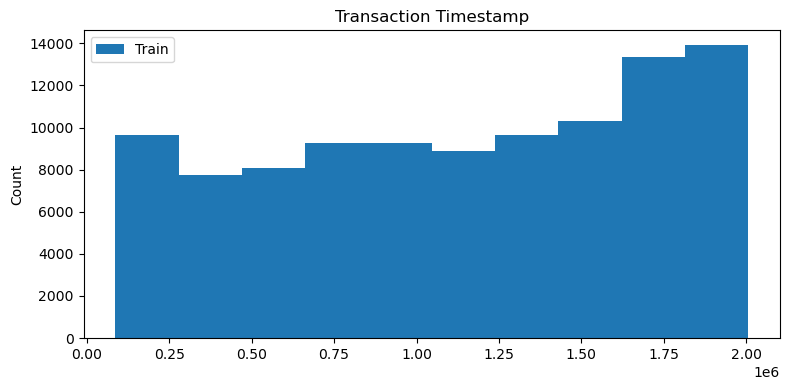

In [49]:
# Timestamp of train and test data
plt.figure(figsize=(8, 4))
plt.hist(df['TransactionDT'], label='Train')
plt.ylabel('Count')
plt.title('Transaction Timestamp')
plt.legend()
plt.tight_layout()
plt.show()


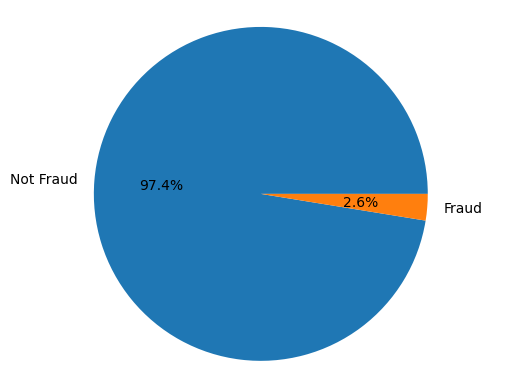

In [50]:
# Class imbalance check
plt.pie(df.isFraud.value_counts(), labels=['Not Fraud', 'Fraud'], autopct='%0.1f%%')
plt.axis('equal')
plt.show()

In [75]:
#Standardization

from sklearn import preprocessing

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
test_scaled = scaler.transform(test)
del X_train, X_val, test

ValueError: could not convert string to float: 'R'

In [76]:
# Apply SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)  # You can adjust 'sampling_strategy' as needed
X_encoded, y = smote.fit_resample(X, y)

# Print the resampled data
print("Original class distribution:", y.value_counts())
print("Resampled class distribution:", y_resampled.value_counts())

ValueError: could not convert string to float: 'W'